# Lab 4
## More Data Scraping and EDA

In this lab, you will improve your skills in scraping data from web pages, organizing the data in a desired format, and performing EDA.

For this lab, we are reusing code from Harvard's CS109: https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb

## Lab3.A. Run code for scraping Indeed.com data

You firs task will be to exectute the following blocks of code and try to understand what is happening after each line of the code. You will have to answer several questions to show your understanding.

Let us start with importing of the relevant packages.

In [2]:
import requests
import bs4 #this is beautiful soup

import time
from pandas import Series
import pandas as pd
from pandas import DataFrame
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

As you see, you imported the package called `re`, which supports regular expression operations. You have already used the other packages. 

The following block will access and load the contents of an Indeed.com web page. It will probably give you a warning -- please ignore it.

In [3]:
# Fixed url for job postings containing data scientist
url = 'http://www.indeed.com/jobs?q=data+scientist&l='
# read the website
source = requests.get(url).text
# parse html code
bs_tree = bs4.BeautifulSoup(source)

**Question 1**:
 * What kind of page did you land on? Explain in a few sentences what is the content of this page.
 * What does the "?" and "&" in the url mean?
 * Explore the content of the web page. If you are using Firefox, open the page Inspector to understand how the underlying html code relates to the displayed content.
 * What pieces of the html code are responsible for showing the job title, company name, and job location?
 
The following block of code will figure out how many job ads are there for jobs that contain "data scientist' in the job title.

<html>
    <h3>
        What kind of page did you land on?   
    </h3>
    <p>
   <i>
        <strong>
            I landed on an Indeed job-search page with "data scientist" in the "What (job title, keywords, or company)" user input box in the search area at the top of the page. No location was specified so the job-search results, displayed in the center of the page, where job openings from all over the United States. On the left side of the page were different categories to sort/filter the job-search results. Overall this page displayed information on open data science jobs in the United States, while providing some information on the current salary market for data scientist on the right side.
        </strong>
    </i>
    </p>
</html> 

<html>
    <h3>
        What does the "?" and "&" in the url mean?   
    </h3>
    <p>
       <i>
        <strong>
                "?" in the URL acts as a separator, it indicates the end of the URL resource path and start of query parameters. 
                "&" in the URL separates the query string field-value pairs.
        </strong>
       </i>
    </p>
</html>

<html>
     <h3>
        What pieces of the HTML are responsible for showing the job title, company name, and job location?   
    </h3>
    <p>
      <i>
        <strong>
            The HTML code below was responsible for the first job title, company name, and job location result on my job-search page:
             <p>
                 <i>
                    <strong>
                Specifically this HTML below was responsible for the job title:
                     </strong>
                 </i>
            </p>
          </strong>
        </i>
    </p>
          
               <a target=​"_blank" id=​"sja1" data-tn-element=​"jobTitle" class=​"jobtitle turnstileLink" href=​"/​pagead/​clk?​mo=r&​ad=-6NYlbfkN0Do5IJpsXwEG6AHc2aCg9wxC4VDeKn3sAvOnRJ-W7avdIgQv2Y-n1dX5QotCd4QCXn43OLFDrscqoale7OyjFOsotpXvsNjP_0J2JUp3HPUwEYrUVAM8wN-9Q-u4TtfJ04H09AByTC4SJOT2T3W_mIhQIeYYJ5I4mUYCBbyzhW3sRcO_zvlQegnD5meaPiGz0JKzOBYLQmfhjcQKpG4R9eDnZjamHTFcOStkDiTbqkGQa1qelhCIPBRYKJFaZMSAwqZLVmg-tvCfmLFHsA462lwAG9wsOLZwPUmaaENHQnROYrVOwG53OuwvAYsQSqzAOc4RdiL0Y-DCHM8J0E3AF-GxAVyn5Gxo3Dx178UDFZxB2NDJrqTfdKPWbBE-7888a7eoK8EaBMlSYicup8wYq5gp--BWUZ6EFfHOu3LJn2yn8JojmEQ_ekUKpUwct00fizGkwEt1_P7atxjvG0nCKc2vTuJOKy0nuhxfd538GIl2ZoHGpuQ90zyvhQifKHDLroOxGEb_YrapsrWfzMMMXiBAs5XPlaFgoSNdDLBE7bpYrFWH5nP_nftSRjaOAgXOBxm7rUX6RTIf_DeiqrgnVAFIuR3t14bjWju8ywbFd02rTiouVtnb6hcfEi3-h70LZlFvPPiL9XyC2IosOrpF08rKqcx6mikP12SGcKfl0zVCUnR3V7_uPsp3SGs4QYlarb0Vu4VZqHGalfnKzvfcVwzZbrAnohEi0FZfAq9If1xVDDKihqP7yynBmXE3dFGAL3IZgTNTGTWuzmo7HpgIDFN6qGqI9_TbOiTzJZ4NUKfA4qbqHnkgt1HfkTWC6dNc0CCRYOl0rvVrR6Vse0ghYiq7AkK7cZlrKAV7hP5XvP0FEDBV5dZJxWOqjxjitPcE0Fp2oLoDGLi8TkUttyMB4uRIEcEc1q1pe6Qg8xV9fyn3Q==&​vjs=3&​p=1&​sk=&​fvj=0" title=​"Data Scientist" rel=​"noopener nofollow" onmousedown=​"sjomd('sja1')​;​ clk('sja1')​;​" onclick=​"setRefineByCookie([]​)​;​ sjoc('sja1',0)​;​ convCtr('SJ')​">​…​</a>​
              
 <p>
  <i>
    <strong>
      The HTML below was responsible for the company name:
    </strong>
  </i>
 </p>
 
    <div>​
     <span class=​"company">​
      <a data-tn-element=​"companyName" class=​"turnstileLink" target=​"_blank" href=​"/​cmp/​Onemain" onmousedown=​"this.href = appendParamsOnce(this.href, 'from=SERP&​campaignid=&​fromjk=b6d47be12a30e20a&​jcid=682e3d251b8703b7')​" rel=​"noopener">​
        OneMain Financial​</a>​
     </span>​
    </div>​
 <p>
  <i>
    <strong>
      The HTML below was responsible for the company location:
    </strong>
  </i>
 </p>
    
    <div class=​"location">​Wilmington, DE 19805​</div>​
    </div>​    
        
   </strong>
  </i>
 </p>
</html>

In [4]:
# see how many job postings we found
job_count_string = bs_tree.find(id = 'searchCount').contents[0]
print(job_count_string)
job_count_string = job_count_string.split()[-2]

print("Search yielded %s hits." % (job_count_string))

# not that job_count so far is still a string, 
# not an integer, and the , separator prevents 
# us from just casting it to int

job_count_digits = [int(d) for d in job_count_string if d.isdigit()]
job_count = np.sum([digit*(10**exponent) for digit, exponent in 
                    zip(job_count_digits[::-1], range(len(job_count_digits)))])

print(job_count)


        Page 1 of 33,674 jobs
Search yielded 33,674 hits.
33674


# **Question 2**:
* What does the "find(id = 'searchCount')" in the first line mean?
* What does the second line do?

**Question 3**: 
* Write a piece of code that finds the Salary Estimate object on the page

The following piece of code allows you to find the links to all the job ads on the page.

<html>
     <h3>
       Question 2: What does the "find(id = 'searchCount')" in the first line mean?
    </h3>
    <p>
      <i>
        <strong>
            This line finds the id = 'searchCount' in the html code saved in the variable bs_tree. Id's are unique in websites so there is only one id by that name. Once the id is found the text inside the id's div is returned, for the given instance that means "        Page 1 of 33,576 jobs" is stored in job_count_string.
          </strong>
        </i>
    </p>     

<html>
     <h3>
        Question 2: What does the second line do?
    </h3>
    <p>
      <i>
        <strong>
            The second line splits the job_count_string by the spaces, so "        Page 1 of 33,576 jobs" becomes [u'Page', u'1', u'of', u'33,576', u'jobs']. Finally, [-2] steps backward two positions from the end of job_count_string to print "33,576". 
          </strong>
        </i>
    </p>

<html>
     <h3>
        Question 3: (code below)
    </h3>

In [5]:
# see how many job postings we found
Salary_Estimate_string = bs_tree.find(id = 'rb_Salary Estimate')
print Salary_Estimate_string

<div class="rbSection rbOpen" id="rb_Salary Estimate">
<div class="rbHeader">
<span aria-level="3" class="ws_bold" role="heading">
				Salary Estimate</span>
</div>
<div class="rbsrbo" id="SALARY_rbo">
<ul class="rbList">
<li onmousedown="rbptk('rb', 'salest', '1');">
<a href="/q-data-scientist-$55,000-jobs.html" rel="nofollow" title="$55,000 (28460)">$55,000</a> (28460)</li>
<li onmousedown="rbptk('rb', 'salest', '2');">
<a href="/q-data-scientist-$80,000-jobs.html" rel="nofollow" title="$80,000 (21966)">$80,000</a> (21966)</li>
<li onmousedown="rbptk('rb', 'salest', '3');">
<a href="/q-data-scientist-$95,000-jobs.html" rel="nofollow" title="$95,000 (17612)">$95,000</a> (17612)</li>
<li onmousedown="rbptk('rb', 'salest', '4');">
<a href="/q-data-scientist-$115,000-jobs.html" rel="nofollow" title="$115,000 (11117)">$115,000</a> (11117)</li>
<li onmousedown="rbptk('rb', 'salest', '5');">
<a href="/q-data-scientist-$130,000-jobs.html" rel="nofollow" title="$130,000 (6295)">$130,000</a> (

In [18]:
# The website is only listing 10 results per page, 
# so we need to scrape them page after page
num_pages = int(np.ceil(job_count/10.0))

base_url = 'http://www.indeed.com'
job_links = []
for i in range(1): #do range(num_pages) if you want them all
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = requests.get(url).text
    bs_tree = bs4.BeautifulSoup(html_page)
    job_postings = bs_tree.findAll('div', attrs={'class':'jobsearch-SerpJobCard'})
    job_ids = [jp.get('data-jk') for jp in job_postings]
    # go after each link   
    for id in job_ids:
        job_links.append(base_url + '/viewjob?jk=' + id)
    time.sleep(1)

print("We found a lot of jobs: ", len(job_links))

('We found a lot of jobs: ', 19)


In [12]:
job_links

['http://www.indeed.com/viewjob?jk=3dacd4128a366fc0',
 'http://www.indeed.com/viewjob?jk=d4e579444b53e14c',
 'http://www.indeed.com/viewjob?jk=b6d47be12a30e20a',
 'http://www.indeed.com/viewjob?jk=b66f56032e2a57eb',
 'http://www.indeed.com/viewjob?jk=5a4016a059d4e915',
 'http://www.indeed.com/viewjob?jk=4eab7a08f3cfb66b',
 'http://www.indeed.com/viewjob?jk=51bfac919e332012',
 'http://www.indeed.com/viewjob?jk=6b6b2fcdfea8b892',
 'http://www.indeed.com/viewjob?jk=c31dc4c5ff5def3e',
 'http://www.indeed.com/viewjob?jk=a1b7387edad7f773',
 'http://www.indeed.com/viewjob?jk=3c61b195f07c416c',
 'http://www.indeed.com/viewjob?jk=8372136899eb2807',
 'http://www.indeed.com/viewjob?jk=35eca5116efb8b9c',
 'http://www.indeed.com/viewjob?jk=fb1c423dca03df9c',
 'http://www.indeed.com/viewjob?jk=d6da0fd97ff03f53',
 'http://www.indeed.com/viewjob?jk=ed7dea6f9338be21']

**Question 4**:
* explain why is `url` (first line in the for loop) defined as it is. What page are you landing at when `i = 3`?

* What does command `''bs_tree.findAll('div', attrs={'class':'jobsearch-SerpJobCard'})` do?
* Explain the properties and content of `job_links`

**Question 5**:
* Reuse the code above to find links to the first 200 listed data science jobs

The following piece of code accesses and grabs the content of all ads in the `job_links` and extracts all the human-readable text tokens. Then, it counts on how many pages are words `mapreduce`, `spark`, and `visualization` used. It might take a few seconds to execute.

<html>
     <h3>
        Question 4:   
    </h3>
    <p>
      <i>
        <strong>
           explain why is url (first line in the for loop) defined as it is. What page are you landing at when i = 3?
          </strong>
             <p>
                 <i>
                - The url is defined this way becuase it is prepared to step through any given number of search result pages, so as i increases the url will be concatenated with a string to make sure we never scrape the same job listing twice. 
                     <br>
                - page when i = 3: 'http://www.indeed.com/viewjob?jk=94754949a0468a52'>
                 </i>
            </p>
        </i>
    </p>      
 <p>
  <i>
    <strong>
      What does command ''bs_tree.findAll('div', attrs={'class':'jobsearch-SerpJobCard'}) do?
    </strong>
  </i>
 </p>
    <i>
         The above command finds all the instances of div's that start with, 'div class="jobsearch-SerpJobCard'
    </i>
 <p>
  <i>
    <strong>
      Explain the properties and content of job_links:
    </strong>
  </i>
 </p>
  <p>
      <i>
        job_links is a list of url's concatenated with '/viewjob?jk=' and the different id's we collected from 'bs_tree.findAll('div', attrs={'class':'jobsearch-SerpJobCard'})' to load a specific job page. This creates a list of the dedicated individual pages for each job posted on the indeed search results page we're scraping.
      </i>
 </p>
</html>


<html>
     <h3>
        Question 5:   
    </h3>
</html>
    

In [21]:
# The website is only listing 10 results per page, 
# so we need to scrape them page after page
num_pages = int(np.ceil(job_count/10.0))

base_url = 'http://www.indeed.com'
job_links = []
for i in range(12): #do range(num_pages) if you want them all
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = requests.get(url).text
    bs_tree = bs4.BeautifulSoup(html_page)
    job_postings = bs_tree.findAll('div', attrs={'class':'jobsearch-SerpJobCard'})
    #print(job_postings)
    job_ids = [jp.get('data-jk') for jp in job_postings]
    # go after each link   
    for id in job_ids:
        job_links.append(base_url + '/viewjob?jk=' + id)
    time.sleep(1)

print("We found a lot of jobs: ", len(job_links))

('We found a lot of jobs: ', 199)


In [22]:
skill_set = {'mapreduce':0, 'spark':0, 'visualization':0}
counter = 0
for link in job_links:
    counter +=1  
    
    try:
        html_page = requests.get(link).text
    except urllib2.HTTPError:
        print("HTTPError:")
        continue
    except urllib2.URLError:
        print("URLError:")
        continue
    except socket.error as error:
        print("Connection closed")
        continue
    #print(html_page)  
    html_text = re.sub("[^a-z.+3]"," ", html_page.lower())
    # replace all but the listed characters
    for key in skill_set.keys():
        if key in html_text:  
            
            skill_set[key] +=1
                    
    if counter % 5 == 0:
        print(len(job_links) - counter)
        print(skill_set)
            
print(skill_set)

194
{'visualization': 2, 'spark': 4, 'mapreduce': 0}
189
{'visualization': 3, 'spark': 4, 'mapreduce': 0}
184
{'visualization': 5, 'spark': 4, 'mapreduce': 0}
179
{'visualization': 6, 'spark': 6, 'mapreduce': 0}
174
{'visualization': 7, 'spark': 7, 'mapreduce': 0}
169
{'visualization': 8, 'spark': 8, 'mapreduce': 0}
164
{'visualization': 11, 'spark': 8, 'mapreduce': 0}
159
{'visualization': 14, 'spark': 9, 'mapreduce': 0}
154
{'visualization': 16, 'spark': 10, 'mapreduce': 1}
149
{'visualization': 17, 'spark': 12, 'mapreduce': 1}
144
{'visualization': 20, 'spark': 15, 'mapreduce': 1}
139
{'visualization': 22, 'spark': 17, 'mapreduce': 1}
134
{'visualization': 23, 'spark': 20, 'mapreduce': 1}
129
{'visualization': 23, 'spark': 20, 'mapreduce': 1}
124
{'visualization': 26, 'spark': 21, 'mapreduce': 1}
119
{'visualization': 27, 'spark': 22, 'mapreduce': 1}
114
{'visualization': 30, 'spark': 24, 'mapreduce': 1}
109
{'visualization': 31, 'spark': 26, 'mapreduce': 1}
104
{'visualization': 34

**Question 6**
* What does the `re.sub()` do in the above code? To answer this, you will have to go to the documentation of the regular expression package (find it on web).
* What is the meaning of `[^a-z.+3]`?
* What is the content of `skill_set`?

The following piece of code plots the counts of different skills in the processed ads.

<html>
     <h3>
        Question 6:   
    </h3>
    <p>
      <i>
        <strong>
   - re.sub() return the string obtained by replacing the leftmost non-overlapping occurrences of pattern in string by the replacement repl. If the pattern isn’t found, string is returned unchanged. repl can be a string or a function; if it is a string, any backslash escapes in it are processed. That is, \n is converted to a single newline character, \r is converted to a linefeed, and so forth. Unknown escapes such as \j are left alone. Backreferences, such as \6, are replaced with the substring matched by group 6 in the pattern.
          </strong>
          </i>
     </p>
          <p> 
              <i>
<strong>
   - [^a-z.+3] is a pattern of characters we're going to look for in the html_page. The meaning of [^a-z.+3] is complicated, but the brackets indicate we're looking for a set of characters. ^ indicates matching the start of the string, and in MULTILINE mode also matches immediately after each newline. the a-z determines that we will match with all lowercase alphabetical characters. The . matches any character except a newline. The + causes the resulting RE to match 1 or more repetitions of the preceding RE. and the 3 is added to the end of each set of characters we add to html_text.
</strong>
                  </i>
              </p>
       <p>
         <i>
          <strong>
   - skill_set is a dictionary that contains keywords we are searching for in the html pages that we're scraping, and the count of the occurrence of those keywords.
          </strong>
         </i>
      </p>
</html>      


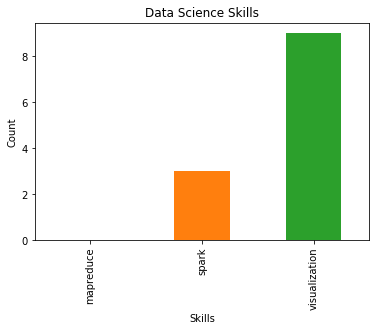

In [20]:
pseries = pd.Series(skill_set)
pseries.sort_values(ascending=False)

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
## set the x label
plt.xlabel('Skills')
## set the y label
plt.ylabel('Count')
## show the plot
plt.show()

**Question 7**:
- rerun the code to find the counts of the 3 data science skills on the first 200 job ads

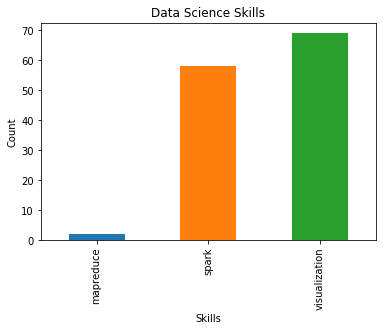

In [23]:
pseries = pd.Series(skill_set)
pseries.sort_values(ascending=False)

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
## set the x label
plt.xlabel('Skills')
## set the y label
plt.ylabel('Count')
## show the plot
plt.show()

## Lab 3.B: Data analysis of job skills
In the first part of the lab, you created `skill_set` dictionary that counts occurences of 3 important data science skills. In this part of the lab we are asking you to create pandas `DataFrame` object as a table whose rows correspond to individual ads and columns correspond to important information about the ads and skills mentioned on those pages. Let us call the table `job_ads`. Process the first 1,000 data science ads, so your table should have 1,000 rows. For each ad, you will have to create the following columns:
- job title
- company name
- job location
- skill 1
- skill 2
- ...
- skill 20

Job title, company name, and job locations will be readable from the Indeed.com page. We are asking you to list 20 skills, instead of only 3 in the code above ('mapreduce', 'spark', 'visualization'). You will need to find another 17 words that are commonly used in data science job ads. To do it, please explore the content of at least 10 ads.

Once you creat your `job_ads` table, please preform EDA of the table, in a similar way you did in Lab 2: provide code and a 2-page document that summarizes interesitng insights about the first 1,000 data science jobs.

**Deliverables**:
- the modified Lab 4 .ipynb file that contains all the answers to the questions
- a 2-page documents presenting the results of your EDA of the `job_ads` data

In [47]:
num_pages = int(np.ceil(job_count/10.0))

base_url = 'http://www.indeed.com'
job_links = []
for i in range(65): #do range(num_pages) if you want them all
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = requests.get(url).text
    bs_tree = bs4.BeautifulSoup(html_page)
    job_postings = bs_tree.findAll('div', attrs={'class':'jobsearch-SerpJobCard'})
    #print(job_postings)
    job_ids = [jp.get('data-jk') for jp in job_postings]
    # go after each link   
    for id in job_ids:
        job_links.append(base_url + '/viewjob?jk=' + id)
    time.sleep(1)

print("We found a lot of jobs: ", len(job_links))

('We found a lot of jobs: ', 1088)


In [49]:
skill_set = {'mapreduce':0, 'spark':0, 'visualization':0, 'python':0, 'sql':0, 'mysql':0, 'r':0, 
             'machine learning':0, 'tableau':0, 'powerbi':0, 'statistics':0, 'mathematics':0, 
             'computer science':0, 'data science':0, 'masters':0, 'perl':0, 'hadoop':0, 'big data':0, 'nosql':0, 
             'c':0, 'c++':0, 'javascript':0}
counter = 0
for link in job_links:
    counter +=1  
    
    try:
        html_page = requests.get(link).text
    except urllib2.HTTPError:
        print("HTTPError:")
        continue
    except urllib2.URLError:
        print("URLError:")
        continue
    except socket.error as error:
        print("Connection closed")
        continue

    bs_tree = bs4.BeautifulSoup(html_page)
    #print(link)
    
    if (job_title is not None):
        job_title = bs_tree.find('h3', attrs={'class':'jobsearch-JobInfoHeader-title'}).contents[0]
    else:
        job_title = bs_tree.find('h3', attrs={'class':'jobsearch-JobInfoHeader-title'})
    
    if (bs_tree.find('div', attrs={'class':'icl-u-xs-mr--xs'}) is not None):
         job_company = bs_tree.find('div', attrs={'class':'icl-u-xs-mr--xs'}).contents[0]
    else:
        job_company = bs_tree.find('span', attrs={'class':'icl-u-xs-mr--xs'})
    
    
    if (bs_tree.find('div', attrs={'class':'jobsearch-InlineCompanyRating'}) is not None):
        job_loc_temp = bs_tree.find('div', attrs={'class':'jobsearch-InlineCompanyRating'}).contents[-1]
    else:
        job_loc_temp = bs_tree.find('div', attrs={'class':'jobsearch-InlineCompanyRating'})
    
    job_loc_temp = repr(job_loc_temp)
    #job_loc_temp1 = job_loc_temp.split("div>",2)
    
    length = len(job_loc_temp)
    job_loc_temp = job_loc_temp[5:length-6]
    
    
    print(job_title)
    print(job_company)
    print(job_loc_temp)
    #print(job_company_text)
    
    html_text = re.sub("[a-z+]"," ", html_page.lower())
    #print(html_page)
    # replace all but the listed characters
    for key in skill_set.keys():
        if key in html_text:  
            
            skill_set[key] +=1
    #print "hello"
    
    if counter % 1 == 0:
        #print(len(job_links) - counter)
        #print(skill_set)
        df = pd.DataFrame(data=skill_set, index=[counter])
        print(df)
        print (df[0:5]);
    skill_set = {'mapreduce':0, 'spark':0, 'visualization':0, 'python':0, 'sql':0, 'mysql':0, 'r':0, 
             'machine learning':0, 'tableau':0, 'powerbi':0, 'statistics':0, 'mathematics':0, 
             'computer science':0, 'data science':0, 'masters':0, 'perl':0, 'hadoop':0, 'big data':0, 'nosql':0, 
             'c':0, 'c++':0, 'javascript':0}

#print(skill_set)
df = pd.DataFrame(data=skill_set, index=[0])
#print(tabulate(print_table, headers=headers))
print(df)



Data Scientist / Machine Learning Expert
SphereOI Studios
McLean, VA
   big data  c  c++  computer science  data science  hadoop  javascript  \
1         0  0    0                 0             0       0           0   

   machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
1                 0          0        0      ...            0     0        0   

   python  r  spark  sql  statistics  tableau  visualization  
1       0  0      0    0           0        0              0  

[1 rows x 22 columns]
   big data  c  c++  computer science  data science  hadoop  javascript  \
1         0  0    0                 0             0       0           0   

   machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
1                 0          0        0      ...            0     0        0   

   python  r  spark  sql  statistics  tableau  visualization  
1       0  0      0    0           0        0              0  

[1 rows x 22 columns]
PwC Labs 

DATA SCIENTIST
University of Pennsylvania
Philadelphia, PA
    big data  c  c++  computer science  data science  hadoop  javascript  \
10         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
10                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
10       0  0      0    0           0        0              0  

[1 rows x 22 columns]
    big data  c  c++  computer science  data science  hadoop  javascript  \
10         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
10                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
10       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Associa

Data Scientist
OneMain Financial
Wilmington, DE 19805
    big data  c  c++  computer science  data science  hadoop  javascript  \
19         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
19                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
19       0  0      0    0           0        0              0  

[1 rows x 22 columns]
    big data  c  c++  computer science  data science  hadoop  javascript  \
19         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
19                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
19       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Scienti

Junior Data Scientist
The World Bank Group
Washington, DC
    big data  c  c++  computer science  data science  hadoop  javascript  \
28         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
28                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
28       0  0      0    0           0        0              0  

[1 rows x 22 columns]
    big data  c  c++  computer science  data science  hadoop  javascript  \
28         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
28                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
28       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Senior D

Data Scientist
OneMain Financial
Wilmington, DE 19805
    big data  c  c++  computer science  data science  hadoop  javascript  \
37         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
37                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
37       0  0      0    0           0        0              0  

[1 rows x 22 columns]
    big data  c  c++  computer science  data science  hadoop  javascript  \
37         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
37                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
37       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Associate Da

Data Scientist
Amazon.com
United States
    big data  c  c++  computer science  data science  hadoop  javascript  \
46         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
46                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
46       0  0      0    0           0        0              0  

[1 rows x 22 columns]
    big data  c  c++  computer science  data science  hadoop  javascript  \
46         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
46                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
46       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Junior Data Scientist
The 

Data Scientist
Mille Lacs Corporate Ventures
Onamia, MN
    big data  c  c++  computer science  data science  hadoop  javascript  \
55         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
55                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
55       0  0      0    0           0        0              0  

[1 rows x 22 columns]
    big data  c  c++  computer science  data science  hadoop  javascript  \
55         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
55                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
55       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Scien

Applied Data Scientist, Nonprofit
Civis Analytics
Chicago, IL
    big data  c  c++  computer science  data science  hadoop  javascript  \
64         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
64                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
64       0  0      0    0           0        0              0  

[1 rows x 22 columns]
    big data  c  c++  computer science  data science  hadoop  javascript  \
64         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
64                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
64       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data

Data Scientist / Machine Learning Expert
SphereOI Studios
McLean, VA
    big data  c  c++  computer science  data science  hadoop  javascript  \
73         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
73                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
73       0  0      0    0           0        0              0  

[1 rows x 22 columns]
    big data  c  c++  computer science  data science  hadoop  javascript  \
73         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
73                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
73       0  0      0    0           0        0              0  

[1 rows x 22 column

Data Scientist
Shipt
San Francisco, CA
    big data  c  c++  computer science  data science  hadoop  javascript  \
82         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
82                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
82       0  0      0    0           0        0              0  

[1 rows x 22 columns]
    big data  c  c++  computer science  data science  hadoop  javascript  \
82         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
82                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
82       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Scientist, Markets Res

Data Scientist / Machine Learning Expert
SphereOI Studios
McLean, VA
    big data  c  c++  computer science  data science  hadoop  javascript  \
91         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
91                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
91       0  0      0    0           0        0              0  

[1 rows x 22 columns]
    big data  c  c++  computer science  data science  hadoop  javascript  \
91         0  0    0                 0             0       0           0   

    machine learning  mapreduce  masters      ...        nosql  perl  powerbi  \
91                 0          0        0      ...            0     0        0   

    python  r  spark  sql  statistics  tableau  visualization  
91       0  0      0    0           0        0              0  

[1 rows x 22 column

Data Scientist, Licensing Operations
Spotify
New York, NY 10011
     big data  c  c++  computer science  data science  hadoop  javascript  \
100         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
100                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
100        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
100         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
100                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
100        0       0  0      0    0           0        0              0  

[1 rows x 22

Entry Level Supply Chain Specialist
BOEING
Ridley Park, PA
     big data  c  c++  computer science  data science  hadoop  javascript  \
109         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
109                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
109        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
109         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
109                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
109        0       0  0      0    0           0        0              0  

[1 rows x 22 colu

MACHINE LEARNING AND DATA ANALYTICS RESEARCHER
Andrew Davidson & Co
United States
     big data  c  c++  computer science  data science  hadoop  javascript  \
118         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
118                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
118        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
118         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
118                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
118        0       0  0      0    0           0        0             

Data Scientist I
Black Knight Financial Services
Philadelphia, PA
     big data  c  c++  computer science  data science  hadoop  javascript  \
127         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
127                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
127        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
127         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
127                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
127        0       0  0      0    0           0        0              0  

[1 rows x 

Hiring for Jr.Data Scientist @ All Over USA
9th Networks Inc.,
Somersworth, NH
     big data  c  c++  computer science  data science  hadoop  javascript  \
136         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
136                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
136        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
136         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
136                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
136        0       0  0      0    0           0        0              0 

Data Scientist Senior
Northeast Information Discovery
Canastota, NY
     big data  c  c++  computer science  data science  hadoop  javascript  \
145         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
145                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
145        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
145         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
145                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
145        0       0  0      0    0           0        0              0  

[1 rows 

Data Scientist Intern
Greystone Hotels
San Francisco, CA
     big data  c  c++  computer science  data science  hadoop  javascript  \
154         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
154                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
154        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
154         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
154                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
154        0       0  0      0    0           0        0              0  

[1 rows x 22 column

Hiring for Jr.Data Scientist @ All Over USA
9th Networks Inc.,
Somersworth, NH
     big data  c  c++  computer science  data science  hadoop  javascript  \
163         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
163                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
163        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
163         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
163                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
163        0       0  0      0    0           0        0              0 

Data Scientist / Machine Learning Expert
SphereOI Studios
McLean, VA
     big data  c  c++  computer science  data science  hadoop  javascript  \
172         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
172                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
172        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
172         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
172                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
172        0       0  0      0    0           0        0              0  

[1 rows

Data Scientist
Citi
New York, NY 10261
     big data  c  c++  computer science  data science  hadoop  javascript  \
181         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
181                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
181        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
181         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
181                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
181        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
DATA SCIENTIST


Data Scientist / Machine Learning Expert
SphereOI Studios
McLean, VA
     big data  c  c++  computer science  data science  hadoop  javascript  \
190         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
190                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
190        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
190         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
190                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
190        0       0  0      0    0           0        0              0  

[1 rows

Data Scientist
None

     big data  c  c++  computer science  data science  hadoop  javascript  \
199         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
199                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
199        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
199         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
199                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
199        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Scientist - Supply Chain Ana

PwC Labs - Data Scientist - Associate
PwC
New York, NY 10017
     big data  c  c++  computer science  data science  hadoop  javascript  \
208         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
208                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
208        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
208         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
208                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
208        0       0  0      0    0           0        0              0  

[1 rows x 22 co

Data Scientist - Ads/Subscriptions
Roblox
San Mateo, CA
     big data  c  c++  computer science  data science  hadoop  javascript  \
217         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
217                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
217        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
217         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
217                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
217        0       0  0      0    0           0        0              0  

[1 rows x 22 columns

Data Scientist, Analytics
dv01
New York State
     big data  c  c++  computer science  data science  hadoop  javascript  \
226         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
226                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
226        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
226         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
226                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
226        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Associat

Data Scientist
OneMain Financial
Wilmington, DE 19805
     big data  c  c++  computer science  data science  hadoop  javascript  \
235         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
235                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
235        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
235         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
235                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
235        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]


Data Visualization Internship - Spring/Summer 2019
Zest Finance
Los Angeles, CA
     big data  c  c++  computer science  data science  hadoop  javascript  \
244         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
244                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
244        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
244         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
244                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
244        0       0  0      0    0           0        0              0

Data Scientist
Mille Lacs Corporate Ventures
Onamia, MN
     big data  c  c++  computer science  data science  hadoop  javascript  \
253         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
253                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
253        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
253         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
253                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
253        0       0  0      0    0           0        0              0  

[1 rows x 22 columns

Data Scientist, Accounting
None

     big data  c  c++  computer science  data science  hadoop  javascript  \
262         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
262                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
262        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
262         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
262                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
262        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Scientist, Comme

Data Scientist - Conshohocken, PA
RS Energy Group
Conshohocken, PA
     big data  c  c++  computer science  data science  hadoop  javascript  \
271         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
271                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
271        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
271         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
271                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
271        0       0  0      0    0           0        0              0  

[1 rows x

Data Scientist
Central Intelligence Agency
Washington, DC
     big data  c  c++  computer science  data science  hadoop  javascript  \
280         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
280                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
280        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
280         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
280                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
280        0       0  0      0    0           0        0              0  

[1 rows x 22 colum

Data Scientist / Machine Learning Expert
SphereOI Studios
McLean, VA
     big data  c  c++  computer science  data science  hadoop  javascript  \
289         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
289                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
289        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
289         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
289                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
289        0       0  0      0    0           0        0              0  

[1 rows

Data Scientist
American Eagle Outfitters
Pittsburgh, PA 15205
     big data  c  c++  computer science  data science  hadoop  javascript  \
298         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
298                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
298        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
298         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
298                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
298        0       0  0      0    0           0        0              0  

[1 rows x 22 c

Data Scientist / Machine Learning Expert
SphereOI Studios
McLean, VA
     big data  c  c++  computer science  data science  hadoop  javascript  \
307         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
307                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
307        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
307         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
307                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
307        0       0  0      0    0           0        0              0  

[1 rows

Video Data Scientist, Apple Media Products Data Science
Apple
Santa Clara Valley, CA
     big data  c  c++  computer science  data science  hadoop  javascript  \
316         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
316                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
316        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
316         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
316                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
316        0       0  0      0    0           0        0          

PwC Labs - Data Scientist - Associate
PwC
New York, NY 10017
     big data  c  c++  computer science  data science  hadoop  javascript  \
325         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
325                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
325        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
325         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
325                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
325        0       0  0      0    0           0        0              0  

[1 rows x 22 co

Data Scientist
Zenreach
San Francisco, CA
     big data  c  c++  computer science  data science  hadoop  javascript  \
334         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
334                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
334        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
334         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
334                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
334        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Front End So

Data Solutions Consultant, Emerging Products
Google
New York, NY 10011
     big data  c  c++  computer science  data science  hadoop  javascript  \
343         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
343                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
343        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
343         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
343                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
343        0       0  0      0    0           0        0              0  

[1 ro

Data Scientist
DISNEY
New York, NY 10036
     big data  c  c++  computer science  data science  hadoop  javascript  \
352         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
352                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
352        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
352         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
352                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
352        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Scientis

Data Scientist
Food52
New York, NY 10001
     big data  c  c++  computer science  data science  hadoop  javascript  \
361         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
361                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
361        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
361         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
361                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
361        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Campus Data S

Data Scientist / Machine Learning Expert
SphereOI Studios
McLean, VA
     big data  c  c++  computer science  data science  hadoop  javascript  \
370         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
370                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
370        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
370         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
370                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
370        0       0  0      0    0           0        0              0  

[1 rows

Data Analytics, Co-op
Asics Digital
Boston, MA
     big data  c  c++  computer science  data science  hadoop  javascript  \
379         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
379                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
379        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
379         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
379                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
379        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Sc

Associate Data Scientist (Analytics and Visualization Specialist)
Virginia Mason Memorial
Yakima, WA 98902
     big data  c  c++  computer science  data science  hadoop  javascript  \
388         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
388                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
388        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
388         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
388                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
388        0       0  0      0    0         

Data Scientist
Geophy
New York, NY
     big data  c  c++  computer science  data science  hadoop  javascript  \
397         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
397                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
397        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
397         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
397                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
397        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Summer Intern - Gra

Data Scientist / Machine Learning Expert
SphereOI Studios
McLean, VA
     big data  c  c++  computer science  data science  hadoop  javascript  \
406         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
406                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
406        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
406         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
406                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
406        0       0  0      0    0           0        0              0  

[1 rows

Data Scientist
WVU Medicine
Morgantown, WV 26505
     big data  c  c++  computer science  data science  hadoop  javascript  \
415         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
415                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
415        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
415         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
415                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
415        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data 

Data Scientist
AppDynamics
San Francisco, CA 94107
     big data  c  c++  computer science  data science  hadoop  javascript  \
424         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
424                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
424        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
424         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
424                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
424        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Dat

Data Scientist
Interactive Brokers
New York, NY
     big data  c  c++  computer science  data science  hadoop  javascript  \
433         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
433                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
433        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
433         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
433                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
433        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data S

Data Scientist / Machine Learning Expert
SphereOI Studios
McLean, VA
     big data  c  c++  computer science  data science  hadoop  javascript  \
442         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
442                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
442        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
442         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
442                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
442        0       0  0      0    0           0        0              0  

[1 rows

Data Scientist - Artificial Intelligence
Ulta Beauty
Bolingbrook, IL 60440
     big data  c  c++  computer science  data science  hadoop  javascript  \
451         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
451                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
451        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
451         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
451                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
451        0       0  0      0    0           0        0              0  

[

Data Scientist
Movado
New York, NY 10018
     big data  c  c++  computer science  data science  hadoop  javascript  \
460         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
460                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
460        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
460         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
460                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
460        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
NLP & Machine

Data Scientist
SAP
San Francisco, CA
     big data  c  c++  computer science  data science  hadoop  javascript  \
469         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
469                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
469        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
469         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
469                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
469        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Scientist Se

Data Scientist Senior
Northeast Information Discovery
Canastota, NY
     big data  c  c++  computer science  data science  hadoop  javascript  \
478         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
478                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
478        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
478         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
478                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
478        0       0  0      0    0           0        0              0  

[1 rows 

Data Scientist - New York
None

     big data  c  c++  computer science  data science  hadoop  javascript  \
487         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
487                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
487        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
487         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
487                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
487        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Entry Level Systems an

Software Developer/Data Scientist
General Atomics
San Diego, CA 92121
     big data  c  c++  computer science  data science  hadoop  javascript  \
496         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
496                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
496        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
496         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
496                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
496        0       0  0      0    0           0        0              0  

[1 row

Data Scientist Senior
Northeast Information Discovery
Canastota, NY
     big data  c  c++  computer science  data science  hadoop  javascript  \
505         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
505                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
505        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
505         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
505                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
505        0       0  0      0    0           0        0              0  

[1 rows 

Data Scientist
Everlaw
Oakland, CA 94612
     big data  c  c++  computer science  data science  hadoop  javascript  \
514         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
514                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
514        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
514         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
514                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
514        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Scientis

Associate Data Scientist (Analytics and Visualization Specialist)
Virginia Mason Memorial
Yakima, WA 98902
     big data  c  c++  computer science  data science  hadoop  javascript  \
523         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
523                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
523        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
523         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
523                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
523        0       0  0      0    0         

Data Scientist, Consultant
Fiserv
Parsippany, NJ 07054
     big data  c  c++  computer science  data science  hadoop  javascript  \
532         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
532                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
532        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
532         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
532                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
532        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]

Data Scientist
AppDynamics
San Francisco, CA 94107
     big data  c  c++  computer science  data science  hadoop  javascript  \
541         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
541                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
541        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
541         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
541                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
541        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Dat

Data Scientist
Billy Casper Golf
Reston, VA
     big data  c  c++  computer science  data science  hadoop  javascript  \
550         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
550                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
550        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
550         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
550                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
550        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Scien

Pre-Sales, Data Scientist
Socure
New York, NY 10001
     big data  c  c++  computer science  data science  hadoop  javascript  \
559         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
559                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
559        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
559         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
559                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
559        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Da

Data Scientist - Conshohocken, PA
RS Energy Group
Conshohocken, PA
     big data  c  c++  computer science  data science  hadoop  javascript  \
568         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
568                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
568        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
568         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
568                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
568        0       0  0      0    0           0        0              0  

[1 rows x

Product Data Scientist
Twitter
San Francisco, CA 94103
     big data  c  c++  computer science  data science  hadoop  javascript  \
577         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
577                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
577        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
577         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
577                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
577        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]

PwC Labs - Data Scientist - Associate
PwC
New York, NY 10017
     big data  c  c++  computer science  data science  hadoop  javascript  \
586         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
586                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
586        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
586         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
586                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
586        0       0  0      0    0           0        0              0  

[1 rows x 22 co

Data Scientist
Chenega Corporation
Fort Huachuca, AZ
     big data  c  c++  computer science  data science  hadoop  javascript  \
595         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
595                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
595        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
595         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
595                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
595        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
F

Data Scientist - New Mobility Optimization (Bikes, Scooters)
Uber
San Francisco, CA 94103
     big data  c  c++  computer science  data science  hadoop  javascript  \
604         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
604                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
604        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
604         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
604                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
604        0       0  0      0    0           0        0     

Data Scientist (BS/MS/PhD)
ExxonMobil
Houston, TX 77046
     big data  c  c++  computer science  data science  hadoop  javascript  \
613         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
613                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
613        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
613         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
613                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
613        0       0  0      0    0           0        0              0  

[1 rows x 22 columns

Associate Data Scientist (Analytics and Visualization Specialist)
Virginia Mason Memorial
Yakima, WA 98902
     big data  c  c++  computer science  data science  hadoop  javascript  \
622         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
622                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
622        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
622         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
622                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
622        0       0  0      0    0         

Actuarial Data Scientist
Reliance Standard Life Insurance Company
Philadelphia, PA 19103
     big data  c  c++  computer science  data science  hadoop  javascript  \
631         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
631                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
631        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
631         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
631                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
631        0       0  0      0    0           0        0      

Data Scientist Senior
Northeast Information Discovery
Canastota, NY
     big data  c  c++  computer science  data science  hadoop  javascript  \
640         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
640                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
640        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
640         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
640                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
640        0       0  0      0    0           0        0              0  

[1 rows 

Data Scientist – Intern (Summer 2019)
C3
Redwood City, CA 94063
     big data  c  c++  computer science  data science  hadoop  javascript  \
649         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
649                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
649        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
649         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
649                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
649        0       0  0      0    0           0        0              0  

[1 rows x 22

Data & Applied Scientist
Microsoft
Bellevue, WA 98004
     big data  c  c++  computer science  data science  hadoop  javascript  \
658         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
658                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
658        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
658         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
658                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
658        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]


Associate Data Scientist (Analytics and Visualization Specialist)
Virginia Mason Memorial
Yakima, WA 98902
     big data  c  c++  computer science  data science  hadoop  javascript  \
667         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
667                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
667        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
667         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
667                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
667        0       0  0      0    0         

Data Scientist Intern, Inspector General’s Bureau of Program Integrity and Policy & Government Divisions
Commonwealth of Massachusetts
Boston, MA
     big data  c  c++  computer science  data science  hadoop  javascript  \
676         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
676                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
676        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
676         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
676                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
676  

Associate Data Scientist (Analytics and Visualization Specialist)
None

     big data  c  c++  computer science  data science  hadoop  javascript  \
685         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
685                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
685        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
685         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
685                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
685        0       0  0      0    0           0        0              0  

[1 r

Senior Data Scientist
Staples
Framingham, MA 01702
     big data  c  c++  computer science  data science  hadoop  javascript  \
694         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
694                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
694        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
694         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
694                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
694        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Lea

Data Scientist
Chewy
Fort Lauderdale, FL 33316
     big data  c  c++  computer science  data science  hadoop  javascript  \
703         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
703                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
703        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
703         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
703                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
703        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Sc

Data Scientist
OneMain Financial
Wilmington, DE 19805
     big data  c  c++  computer science  data science  hadoop  javascript  \
712         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
712                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
712        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
712         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
712                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
712        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]


Machine Learning Intern
Apollo AI Inc.
Santa Clara, CA 95054
     big data  c  c++  computer science  data science  hadoop  javascript  \
721         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
721                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
721        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
721         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
721                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
721        0       0  0      0    0           0        0              0  

[1 rows x 22 co

Associate Data Scientist (Analytics and Visualization Specialist)
Virginia Mason Memorial
Yakima, WA 98902
     big data  c  c++  computer science  data science  hadoop  javascript  \
730         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
730                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
730        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
730         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
730                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
730        0       0  0      0    0         

Data Scientist, Consultant
None

     big data  c  c++  computer science  data science  hadoop  javascript  \
739         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
739                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
739        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
739         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
739                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
739        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Associate Data Scient

Data Scientist Senior
Northeast Information Discovery
Canastota, NY
     big data  c  c++  computer science  data science  hadoop  javascript  \
748         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
748                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
748        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
748         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
748                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
748        0       0  0      0    0           0        0              0  

[1 rows 

Data Scientist WOTC
Hasbro
Renton, WA 98057
     big data  c  c++  computer science  data science  hadoop  javascript  \
757         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
757                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
757        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
757         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
757                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
757        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Bell Labs 

Data Scientist Senior
Northeast Information Discovery
Canastota, NY
     big data  c  c++  computer science  data science  hadoop  javascript  \
766         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
766                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
766        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
766         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
766                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
766        0       0  0      0    0           0        0              0  

[1 rows 

Intern - Economics
Amazon.com
Seattle, WA
     big data  c  c++  computer science  data science  hadoop  javascript  \
775         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
775                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
775        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
775         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
775                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
775        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Senior Data 

Data Scientist / Machine Learning Expert
SphereOI Studios
McLean, VA
     big data  c  c++  computer science  data science  hadoop  javascript  \
784         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
784                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
784        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
784         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
784                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
784        0       0  0      0    0           0        0              0  

[1 rows

Data Scientist @ Apple Inc.
TekHiring.com
Sunnyvale, CA
     big data  c  c++  computer science  data science  hadoop  javascript  \
793         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
793                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
793        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
793         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
793                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
793        0       0  0      0    0           0        0              0  

[1 rows x 22 columns

PwC Labs - Data Scientist - Associate
PwC
New York, NY 10017
     big data  c  c++  computer science  data science  hadoop  javascript  \
802         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
802                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
802        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
802         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
802                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
802        0       0  0      0    0           0        0              0  

[1 rows x 22 co

Data Scientist Jr.
Optimal Solutions Group
College Park, MD
     big data  c  c++  computer science  data science  hadoop  javascript  \
811         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
811                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
811        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
811         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
811                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
811        0       0  0      0    0           0        0              0  

[1 rows x 22 col

Associate Data Scientist (Analytics and Visualization Specialist)
Virginia Mason Memorial
Yakima, WA 98902
     big data  c  c++  computer science  data science  hadoop  javascript  \
820         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
820                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
820        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
820         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
820                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
820        0       0  0      0    0         

Data Scientist
Staples
Framingham, MA 01702
     big data  c  c++  computer science  data science  hadoop  javascript  \
829         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
829                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
829        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
829         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
829                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
829        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Scien

PwC Labs - Data Scientist - Associate
PwC
New York, NY 10017
     big data  c  c++  computer science  data science  hadoop  javascript  \
838         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
838                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
838        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
838         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
838                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
838        0       0  0      0    0           0        0              0  

[1 rows x 22 co

Machine Learning Summer Internship 2019
BMW Technology Corporation
Chicago, IL
     big data  c  c++  computer science  data science  hadoop  javascript  \
847         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
847                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
847        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
847         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
847                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
847        0       0  0      0    0           0        0              0 

Data Scientist / Machine Learning Expert
SphereOI Studios
McLean, VA
     big data  c  c++  computer science  data science  hadoop  javascript  \
856         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
856                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
856        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
856         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
856                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
856        0       0  0      0    0           0        0              0  

[1 rows

Data Scientist, Redtech
WeWork
New York, NY
     big data  c  c++  computer science  data science  hadoop  javascript  \
865         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
865                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
865        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
865         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
865                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
865        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Analytical

Associate Data Scientist (Analytics and Visualization Specialist)
Virginia Mason Memorial
Yakima, WA 98902
     big data  c  c++  computer science  data science  hadoop  javascript  \
874         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
874                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
874        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
874         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
874                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
874        0       0  0      0    0         

Junior Data Scientist
BlueVine
Redwood City, CA
     big data  c  c++  computer science  data science  hadoop  javascript  \
883         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
883                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
883        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
883         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
883                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
883        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
2019 E

Associate Data Scientist (Analytics and Visualization Specialist)
Virginia Mason Memorial
Yakima, WA 98902
     big data  c  c++  computer science  data science  hadoop  javascript  \
892         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
892                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
892        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
892         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
892                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
892        0       0  0      0    0         

Data Scientist
Reorg Research
New York, NY
     big data  c  c++  computer science  data science  hadoop  javascript  \
901         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
901                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
901        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
901         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
901                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
901        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Scient

Data Scientist / Machine Learning Expert
SphereOI Studios
McLean, VA
     big data  c  c++  computer science  data science  hadoop  javascript  \
910         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
910                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
910        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
910         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
910                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
910        0       0  0      0    0           0        0              0  

[1 rows

Data Scientist - Cheyenne, WY
Subsystem Technologies, Inc.
United States
     big data  c  c++  computer science  data science  hadoop  javascript  \
919         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
919                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
919        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
919         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
919                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
919        0       0  0      0    0           0        0              0  

[1 

PhD. Graduate - Data Science 1
Expedia
Bellevue, WA 98004
     big data  c  c++  computer science  data science  hadoop  javascript  \
928         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
928                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
928        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
928         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
928                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
928        0       0  0      0    0           0        0              0  

[1 rows x 22 colum

Data Scientist
OneMain Financial
Wilmington, DE 19805
     big data  c  c++  computer science  data science  hadoop  javascript  \
937         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
937                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
937        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
937         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
937                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
937        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]


#Data Scientist
VivusTech
Chantilly, VA
     big data  c  c++  computer science  data science  hadoop  javascript  \
946         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
946                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
946        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
946         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
946                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
946        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Scientist

Data Scientist
OneMain Financial
Wilmington, DE 19805
     big data  c  c++  computer science  data science  hadoop  javascript  \
955         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
955                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
955        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
955         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
955                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
955        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]


Data Scientist
Etiometry
Boston, MA 02134
     big data  c  c++  computer science  data science  hadoop  javascript  \
964         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
964                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
964        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
964         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
964                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
964        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Scienti

Associate Data Scientist (Analytics and Visualization Specialist)
Virginia Mason Memorial
Yakima, WA 98902
     big data  c  c++  computer science  data science  hadoop  javascript  \
973         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
973                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
973        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
973         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
973                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
973        0       0  0      0    0         

Data Scientist Intern
Equifax
Alpharetta, GA 30005
     big data  c  c++  computer science  data science  hadoop  javascript  \
982         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
982                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
982        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
982         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
982                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
982        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Ass

Data Scientist / Machine Learning Expert
SphereOI Studios
McLean, VA
     big data  c  c++  computer science  data science  hadoop  javascript  \
991         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
991                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
991        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
     big data  c  c++  computer science  data science  hadoop  javascript  \
991         0  0    0                 0             0       0           0   

     machine learning  mapreduce  masters      ...        nosql  perl  \
991                 0          0        0      ...            0     0   

     powerbi  python  r  spark  sql  statistics  tableau  visualization  
991        0       0  0      0    0           0        0              0  

[1 rows

Data Scientist
None

      big data  c  c++  computer science  data science  hadoop  javascript  \
1000         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1000                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1000        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
      big data  c  c++  computer science  data science  hadoop  javascript  \
1000         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1000                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1000        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Science Summer 2

Data Scientist
Pairwise
Raleigh-Durham, NC
      big data  c  c++  computer science  data science  hadoop  javascript  \
1009         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1009                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1009        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
      big data  c  c++  computer science  data science  hadoop  javascript  \
1009         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1009                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1009        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]

Data Scientist
None

      big data  c  c++  computer science  data science  hadoop  javascript  \
1018         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1018                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1018        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
      big data  c  c++  computer science  data science  hadoop  javascript  \
1018         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1018                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1018        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
Data Scientist - Cons

Senior Data Scientist
Regis Corporation
Minneapolis, MN 55416
      big data  c  c++  computer science  data science  hadoop  javascript  \
1027         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1027                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1027        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
      big data  c  c++  computer science  data science  hadoop  javascript  \
1027         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1027                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1027        0       0  0      0    0           0        0              0  

[1

Senior Data Scientist
Pilot Flying J
Knoxville, TN
      big data  c  c++  computer science  data science  hadoop  javascript  \
1036         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1036                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1036        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
      big data  c  c++  computer science  data science  hadoop  javascript  \
1036         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1036                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1036        0       0  0      0    0           0        0              0  

[1 rows x 22 

Data Scientist
Trilogy Ed
San Francisco, CA
      big data  c  c++  computer science  data science  hadoop  javascript  \
1044         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1044                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1044        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
      big data  c  c++  computer science  data science  hadoop  javascript  \
1044         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1044                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1044        0       0  0      0    0           0        0              0  

[1 rows x 22 columns

Chief Data Scientist
Moda Operandi
New York, NY 10013
      big data  c  c++  computer science  data science  hadoop  javascript  \
1053         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1053                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1053        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
      big data  c  c++  computer science  data science  hadoop  javascript  \
1053         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1053                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1053        0       0  0      0    0           0        0              0  

[1 rows x 

Machine Learning Engineer
Ribus Group INC
New York, NY
      big data  c  c++  computer science  data science  hadoop  javascript  \
1061         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1061                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1061        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
      big data  c  c++  computer science  data science  hadoop  javascript  \
1061         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1061                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1061        0       0  0      0    0           0        0              0  

[1 rows x

Data Scientist Senior
Northeast Information Discovery
Canastota, NY
      big data  c  c++  computer science  data science  hadoop  javascript  \
1070         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1070                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1070        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
      big data  c  c++  computer science  data science  hadoop  javascript  \
1070         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1070                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1070        0       0  0      0    0           0        0              0

Data Scientist
OneMain Financial
Wilmington, DE 19805
      big data  c  c++  computer science  data science  hadoop  javascript  \
1078         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1078                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1078        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
      big data  c  c++  computer science  data science  hadoop  javascript  \
1078         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1078                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1078        0       0  0      0    0           0        0              0  

[1 rows x 

Machine Learning Consultant
Amazon.com
Herndon, VA
      big data  c  c++  computer science  data science  hadoop  javascript  \
1087         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1087                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1087        0       0  0      0    0           0        0              0  

[1 rows x 22 columns]
      big data  c  c++  computer science  data science  hadoop  javascript  \
1087         0  0    0                 0             0       0           0   

      machine learning  mapreduce  masters      ...        nosql  perl  \
1087                 0          0        0      ...            0     0   

      powerbi  python  r  spark  sql  statistics  tableau  visualization  
1087        0       0  0      0    0           0        0              0  

[1 rows x 22 